##  Игра "Угадай число !"

###  Входные условия: 
   1. Компьютер загадывает число в диапазоне от  1 до 100. Наша задача отгадать данное 
      число за меньшее количество попыток.
   2. Даны несколько вариантов решения задачи: 
   * с помощью циклов <font color='green'> **while** </font> и <font color='green'> **for** </font>
   * с помощью <font color='green'> **функций**</font>
   

### Реализация алгоритма с циклом </font>  <font color='green'>**while**</font>:

 * бесконечный цикл <font color='green'> **while** </font> работает до того момента, когда условие <font color='green'>number == predict</font> станет **истинным**, а значит искомое число отгадано.
 * если пользователь называет число наугад, количество попыток будет разниться, по причине  "шага" следующей попытки:

In [9]:
import numpy as np

count = 0                           # счетчик попыток
number = np.random.randint(1,101)   # загадали число
print ("Загадано число от 1 до 100")
    
while True:                        # бесконечный цикл
    predict = int(input())         # предполагаемое число
    count += 1                     # плюсуем попытку
    if number == predict: break    # выход из цикла, если угадали
    elif number > predict: print (f"Угадываемое число больше {predict} ")
    elif number < predict: print (f"Угадываемое число меньше {predict} ")
            
print (f"Вы угадали число {number} за {count} попыток.")    

Загадано число от 1 до 100
10
Угадываемое число больше 10 
20
Угадываемое число больше 20 
30
Угадываемое число больше 30 
40
Угадываемое число больше 40 
50
Угадываемое число больше 50 
60
Угадываемое число больше 60 
70
Угадываемое число больше 70 
80
Угадываемое число больше 80 
90
Угадываемое число меньше 90 
81
Угадываемое число больше 81 
85
Угадываемое число меньше 85 
84
Угадываемое число меньше 84 
82
Угадываемое число больше 82 
83
Вы угадали число 83 за 14 попыток.


### Реализация алгоритма с циклом **for**:

 * Алгоритм с <font color='green'> **циклом for** </font> реализует линейный поиск в диапазоне от 1 до 100 на каждой итерации прибавляя единицу.   
#### Таким образом, число 1 этот алгоритм "отгадает" за 1 попытку, а число 100 за 100.

In [10]:
import numpy as np
number = np.random.randint(1,101)      # загадали число
print ("Загадано число от 1 до 100")
for count in range(1,101):         # более компактный вариант счетчика
    if number == count: break      # выход из цикла, если угадали      
print (f"Вы угадали число {number} за {count} попыток.")  

Загадано число от 1 до 100
Вы угадали число 62 за 62 попыток.


### Реализация алгоритма с помощью функции и цикла **while**

 * Повторяет логику редыдущего варианта и угадывает 1000 чисел в среднем за 101 попытку.

In [85]:
import numpy as np

def game_core_v1(number):
    count = 0
    while True:
        count+=1
        predict = np.random.randint(1,101) # предполагаемое число
        if number == predict: 
            return count # выход из цикла, если угадали
        
        
def score_game(game_core):
    count_ls = []
    np.random.seed(1)  # фиксируем RANDOM SEED, чтобы ваш эксперимент был воспроизводим!
    random_array = np.random.randint(1,101, size=(1000))
    for number in random_array:
        count_ls.append(game_core(number))
    score = int(np.mean(count_ls))
    print(f"Ваш алгоритм угадывает число в среднем за {score} попыток")
    return(score)

score_game(game_core_v1)

Ваш алгоритм угадывает число в среднем за 101 попыток


101

### Реализация алгоритма с помощью функции, цикла while и операторов ветвления

#### Данный вариант функции добавляет в цикл while условия сравнения предполагаемого числа с загаданным.  
#### Такой алгоритм угадывает 1000 чисел в среднем за 33 попытки. 

In [80]:
def game_core_v2(number):
    count = 1
    predict = np.random.randint(1,101)
    
    
    while number != predict:
        count+=1
        if number > predict: 
            predict += 1
        elif number < predict: 
            predict -= 1
    return(count) # выход из цикла, если угадали

def score_game(game_core):
    count_ls = []
    np.random.seed(1)  # фиксируем RANDOM SEED, чтобы ваш эксперимент был воспроизводим!
    random_array = np.random.randint(1,101, size=(1000))
    for number in random_array:
        count_ls.append(game_core(number))
    score = int(np.mean(count_ls))
    print(f"Ваш алгоритм угадывает число в среднем за {score} попыток")
    return(score)

score_game(game_core_v2)

Ваш алгоритм угадывает число в среднем за 33 попыток


33

### Нам необходимо изменить алгоритм таким образом, чтобы он отгадывал числа за как можно меньшее количество попыток


![title](Desktop\photo_2021-10-22_09-44-01.jpg)

 **Наиболее оптимальным вариантом в данном случае является бинарный поиск, когда мы называем число -  середину  диапазона, в нашем случае это число 50, и если это не искомое число, продолжаем делить отрезки   пополам  смещая границы диапазона и изменяя наше предполагаемое число в соответствии с условиями**.

#### Проверим как работает данный способ на уже знакомом примере:

In [11]:
import numpy as np

count = 0                           # счетчик попыток
number = np.random.randint(1,101)   # загадали число
print ("Загадано число от 1 до 100")
    
while True:                        # бесконечный цикл
    predict = int(input())         # предполагаемое число
    count += 1                     # плюсуем попытку
    if number == predict: break    # выход из цикла, если угадали
    elif number > predict: print (f"Угадываемое число больше {predict} ")
    elif number < predict: print (f"Угадываемое число меньше {predict} ")
            
print (f"Вы угадали число {number} за {count} попыток.")    

Загадано число от 1 до 100
50
Угадываемое число больше 50 
75
Угадываемое число больше 75 
88
Угадываемое число больше 88 
94
Угадываемое число больше 94 
97
Угадываемое число больше 97 
99
Вы угадали число 99 за 6 попыток.


#### Мы угадали число 99 за 6 попыток с помощью  алгоритма бинарного поиска.
#### То есть применяя данный способ, мы можем найти число в диапазоне от 1 до 100, максимум за 7 попыток

### Реализация алгоритма с помощью функции, операторов ветвления и метода бинарного поиска

#### Компьютер рандомно загадывает число в интервале от 1 до 100, то есть наш диапазон - это отсортированный список, который имеет границы и середину. 

#### Обозначим границы следующим образом:
  * **нижняя граница - MIN = 1**
  * **верхняя граница - MAX = 100**
  * **середина - MID = 50**

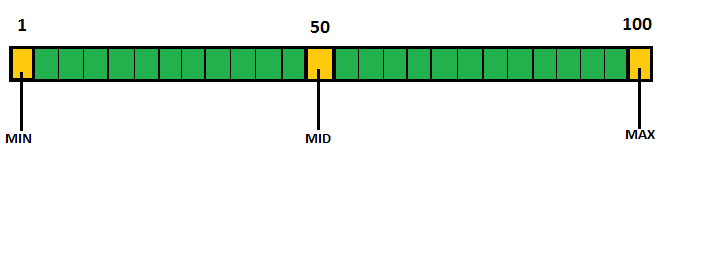

In [13]:
from IPython.display import Image
Image("Desktop\\search_5.png")

#### Следуя алгоритму бинарного поиска, нам необходимо каждый раз сравнивать середину диапазона (MID) c числом, которое загадал компьютер. 
#### MID - это сумма MIN и MAX, деленная пополам, то есть: MID = (MIN + MAX) \\ 2
#### Согласно условию, у  нас есть две переменные number и predict, которые мы сравниваем, следуя логике бинарного поиска, присвоим predict значение MID, то есть predict = (MIN + MAX) \\ 2

#### Начало функции будет иметь следующий вид:

##### import numpy as np

##### def game_core_v3(number):
    number = np.random.randint(1,101)
    count = 1
    min = 1
    max = 100
    predict = (min + max) // 2
    while min <= max and number != predict: # условия выхода из цикла

### Рассмотрим возможные варианты работы алгоритма:

#### 1. Загаданное число больше предполагаемого числа, то есть number > predict 

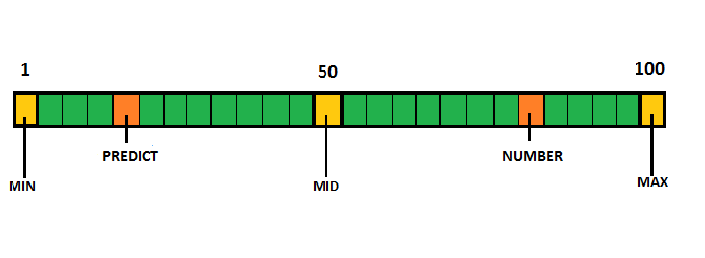

In [15]:
from IPython.display import Image
Image("Desktop\search_2.png")

#### В этом случае минимальная граница MIN смещается вправо на значение predict + 1, то есть мы продожаем поиск в интервале от 51 до 100.
#### Поскольку границы изменились, изменится и predict, который теперь равен середине диапазона от 51 до 100

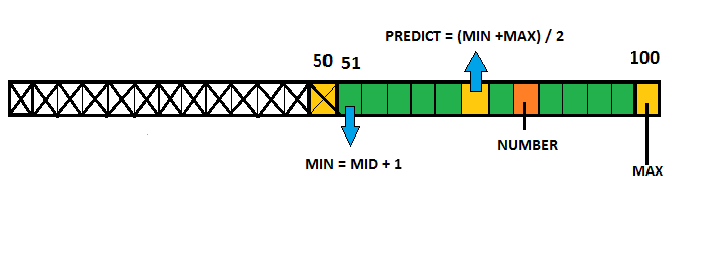

In [17]:
from IPython.display import Image
Image("Desktop\search_3.png")

#### 2. Загаданное число меньше предполагаемого числа, то есть number < predict

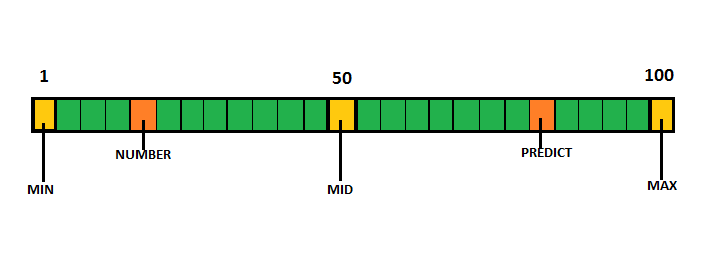

In [19]:
from IPython.display import Image
Image("Desktop\search_0.png")

#### В этом случае максимальная граница MAX смещается влево на значение predict - 1, то есть мы продожаем поиск в интервале от 1 до 49.
#### Поскольку границы изменились, изменится и predict, который теперь равен середине диапазона от 1 до 49

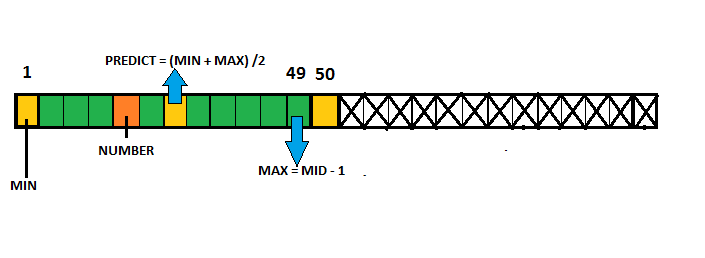

In [20]:
from IPython.display import Image
Image("Desktop\search_1.png")

### Теперь протестируем наш алгоритм  с помощью функции print() и запустим его 5 раз

In [21]:
import numpy as np
import time

def game_core_v3(number):
    number = np.random.randint(1,101)
    count = 1
    min = 1
    max = 100
    predict = (min + max) // 2
    while min <= max and number != predict:
        print(f"Загаданное число: {number}, возможное: {predict}")
        if number > predict:
            min = predict + 1
            predict = (min + max) // 2
        elif number < predict:
            max = predict - 1
            predict = (min + max) // 2 
        count+=1
    print(f"Количество попыток: {count}")
    time.sleep(1)
    return count
    
    
def score_game(game_core):
    count_ls = []
    np.random.seed(0)  # фиксируем RANDOM SEED, чтобы ваш эксперимент был воспроизводим
    random_array = np.random.randint(1,101, size=(5))
    for number in random_array:
        count_ls.append(game_core(number))
    score = int(np.mean(count_ls))
    print(f"Ваш алгоритм угадывает число в среднем за {score} попыток")
    return score

score_game(game_core_v3)


Загаданное число: 10, возможное: 50
Загаданное число: 10, возможное: 25
Загаданное число: 10, возможное: 12
Загаданное число: 10, возможное: 6
Загаданное число: 10, возможное: 9
Количество попыток: 6
Загаданное число: 84, возможное: 50
Загаданное число: 84, возможное: 75
Загаданное число: 84, возможное: 88
Загаданное число: 84, возможное: 81
Количество попыток: 5
Загаданное число: 22, возможное: 50
Загаданное число: 22, возможное: 25
Загаданное число: 22, возможное: 12
Загаданное число: 22, возможное: 18
Загаданное число: 22, возможное: 21
Загаданное число: 22, возможное: 23
Количество попыток: 7
Загаданное число: 37, возможное: 50
Загаданное число: 37, возможное: 25
Количество попыток: 3
Загаданное число: 88, возможное: 50
Загаданное число: 88, возможное: 75
Количество попыток: 3
Ваш алгоритм угадывает число в среднем за 4 попыток


4

### Как видно алгоритм, работающий согласно бинарному поиску угадывает число  в среднем за 4 попытки

### Теперь запустим нашу игру 1000 раз и посмотрим на результат

In [22]:
import numpy as np


def game_core_v3(number):
    number = np.random.randint(1,101)
    count = 1
    min = 1
    max = 100
    predict = (min + max) // 2
    while min <= max and number != predict:
        if number > predict:
            min = predict + 1
            predict = (min + max) // 2
        elif number < predict:
            max = predict - 1
            predict = (min + max) // 2 
        count+=1

    return count
    
    
def score_game(game_core):
    count_ls = []
    np.random.seed(0)  # фиксируем RANDOM SEED, чтобы ваш эксперимент был воспроизводим
    random_array = np.random.randint(1,101, size=(1000))
    for number in random_array:
        count_ls.append(game_core(number))
    score = int(np.mean(count_ls))
    print(f"Ваш алгоритм угадывает число в среднем за {score} попыток")
    return score

score_game(game_core_v3)


Ваш алгоритм угадывает число в среднем за 5 попыток


5